# Analysis: Win Probability vs. Success Probability

This notebook analyzes how the probability of beating a target score changes based on the success probability of a bet.

We compare two options:
* **Option 0:** A bet with EV = 1.0 (e.g., `gain = 1 / p0`).
* **Option 1:** The complementary bet with a different EV (e.g., `EV = 0.917 / (1 - p0)`).

We want to see which is more likely to beat a high target score.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path to import our custom modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from mpp_project.core import calculate_win_probability

In [3]:
# --- Configuration ---
sample_nb = 500
match_nb = 20
verbose = False

# We compare two EVs. Let EV 0 = 1.0
ev1_ev0_ratio = 0.917881 # EV 1 is this many times EV 0

# Probability range to scan
proba_min = 0.1
proba_max = 0.9

# The target score, as a multiple of our base EV (EV 0)
obj_ev0_ratio = 1.08947

# The total score objective (normalized by EV 0 = 1)
total_score_obj = obj_ev0_ratio * match_nb

print(f"Match Count = {match_nb}")
print(f"Target Score = {total_score_obj:.2f} (normalized)")

Match Count = 20
Target Score = 21.79 (normalized)


In [8]:
proba_success_array = np.linspace(proba_min, proba_max, sample_nb)
proba_win_0 = np.zeros(sample_nb)
proba_win_1 = np.zeros(sample_nb)

for idx, p0 in enumerate(proba_success_array):
    # Calculate gain for Option 0 (EV = 1.0)
    g0 = 1.0 / p0
    # Calculate gain for Option 1 (EV = ev1_ev0_ratio)
    p1 = 1 - p0
    g1 = ev1_ev0_ratio / p1

    # Calculate minimum successes needed to beat the objective
    success_nb_min_0 = int(np.ceil(total_score_obj / g0))
    success_nb_min_1 = int(np.ceil(total_score_obj / g1))

    # Calculate the probability of achieving that many successes
    proba_win_0[idx] = calculate_win_probability(success_nb_min_0, match_nb, p0)
    proba_win_1[idx] = calculate_win_probability(success_nb_min_1, match_nb, p1)
    
    if verbose:
        print(f"p={p0:.2f} | g0={g0:.2f} | min_k0={success_nb_min_0} | P(win)={proba_win_0[idx]:.4f}")

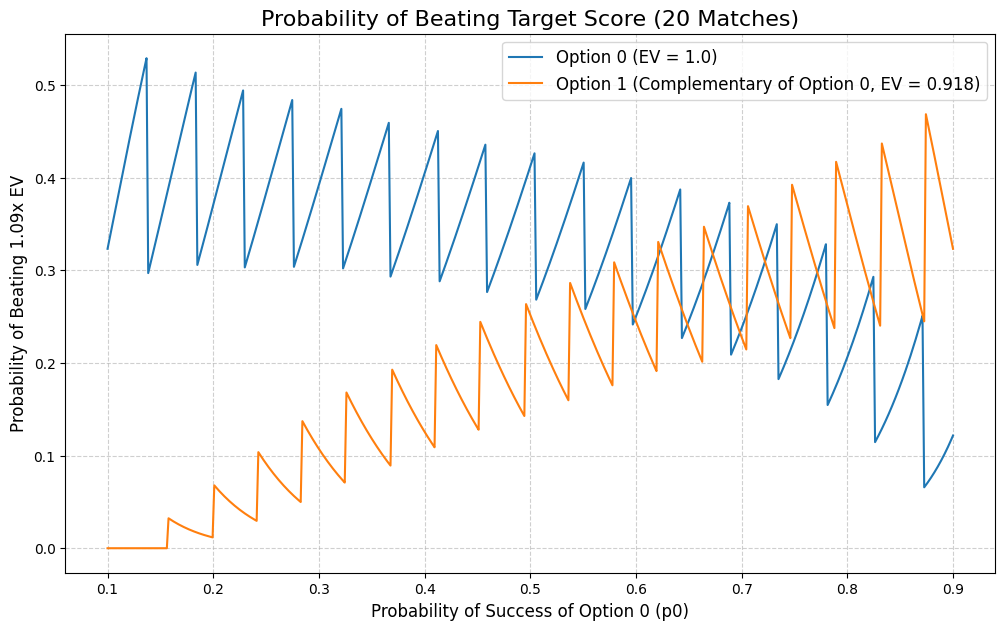

In [13]:
# --- Plotting ---
plt.figure(figsize=(12, 7))
plt.plot(proba_success_array, proba_win_0, label=f"Option 0 (EV = 1.0)")
plt.plot(proba_success_array, proba_win_1, label=f"Option 1 (Complementary of Option 0, EV = {ev1_ev0_ratio:.3f})")

plt.title(f"Probability of Beating Target Score ({match_nb} Matches)", fontsize=16)
plt.xlabel('Probability of Success of Option 0 (p0)', fontsize=12)
plt.ylabel(f'Probability of Beating {obj_ev0_ratio:.2f}x EV', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()